In [2]:
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis

## Data import

In [23]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

# make merged CD86+CD206 datasets
nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset.csv')
nucleus_dataset_p4g4_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_p4g4 = nucleus_dataset_p4g4_206.merge(nucleus_dataset_p4g4_86, how='outer')

nucleus_dataset_smooth_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset.csv')
nucleus_dataset_smooth_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset_smooth = nucleus_dataset_smooth_206.merge(nucleus_dataset_smooth_86, how='outer')

nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset.csv')
nucleus_dataset_tcps_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
nucleus_dataset_tcps = nucleus_dataset_tcps_206.merge(nucleus_dataset_tcps_86, how='outer')


nucleus_dataset_p4g4 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
all_surfaces = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

In [24]:
all_surfaces_86 = pd.concat([nucleus_dataset_p4g4_86, nucleus_dataset_smooth_86, nucleus_dataset_tcps_86])
all_surfaces_206 = pd.concat([nucleus_dataset_p4g4_206, nucleus_dataset_smooth_206, nucleus_dataset_tcps_206])

<AxesSubplot:title={'center':'Intensity_IntegratedIntensity_Nuclei'}, xlabel='CellType'>

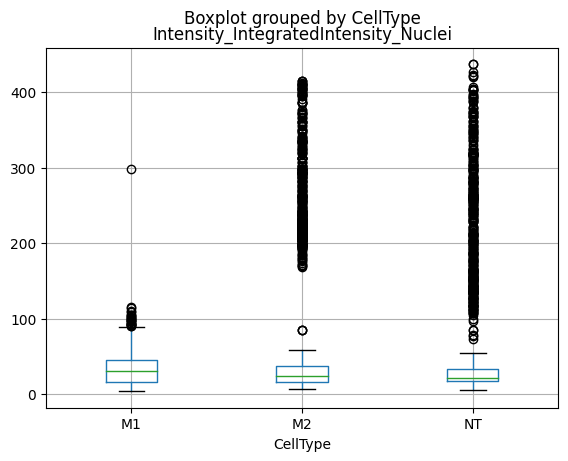

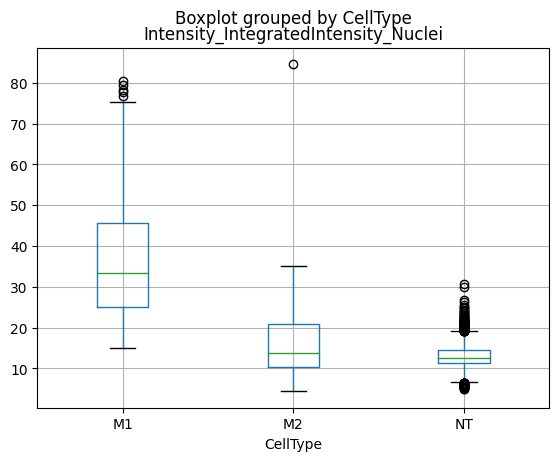

In [25]:
column = 'Intensity_IntegratedIntensity_Nuclei'

all_surfaces_86.boxplot(column, by='CellType')
all_surfaces_206.boxplot(column, by='CellType')

<AxesSubplot:title={'center':'Intensity_IntegratedIntensity_Nuclei'}, xlabel='CellType'>

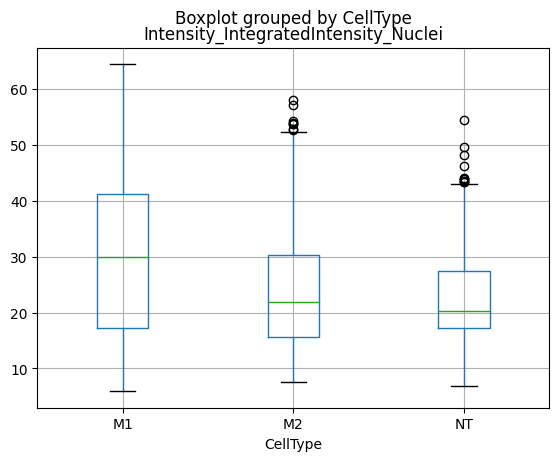

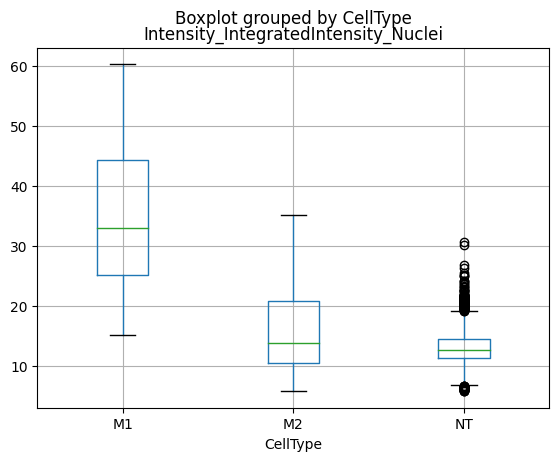

In [26]:
all_surfaces_86 = macrophages_analysis.remove_outliers(all_surfaces_86, column, method='IQR')
all_surfaces_86 = macrophages_analysis.remove_outliers(all_surfaces_86, column, method='percentile')
all_surfaces_206= macrophages_analysis.remove_outliers(all_surfaces_206, column, method='percentile')

all_surfaces_86.boxplot(column, by='CellType')
all_surfaces_206.boxplot(column, by='CellType')

<AxesSubplot:title={'center':'Texture_AngularSecondMoment_Nuclei_3_00_256'}, xlabel='CellType'>

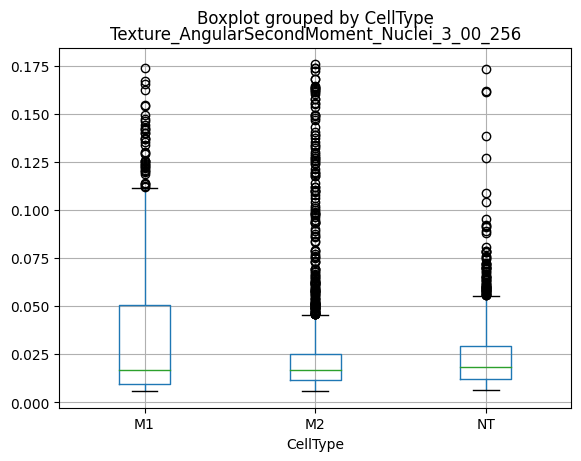

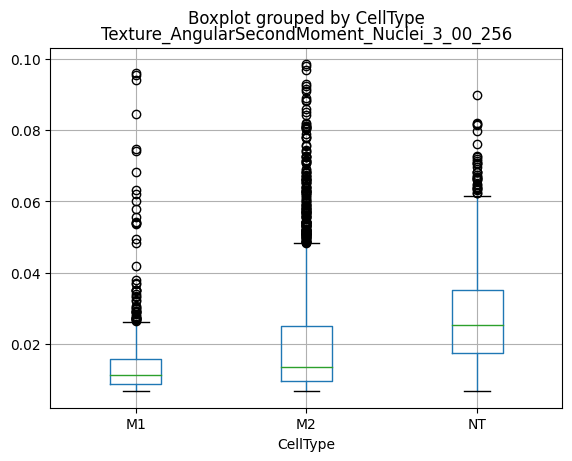

In [22]:
column = 'Texture_AngularSecondMoment_Nuclei_3_00_256'

all_surfaces_86.boxplot(column, by='CellType')
all_surfaces_206.boxplot(column, by='CellType')

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8837778443711917
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8875110931344187


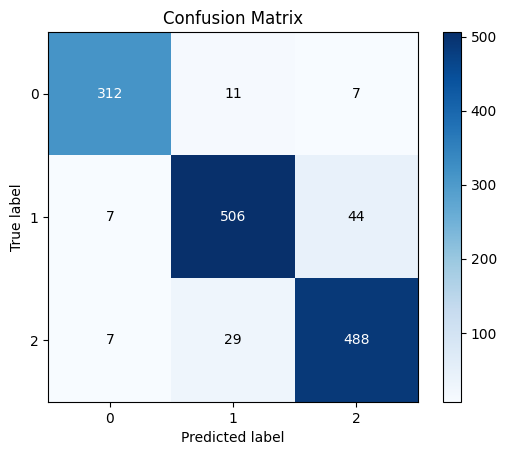

In [3]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9970565974266251
AUC score for M2 0.9861692153095162
AUC score for NT 0.986286220814651
Average AUC 0.9898373445169307


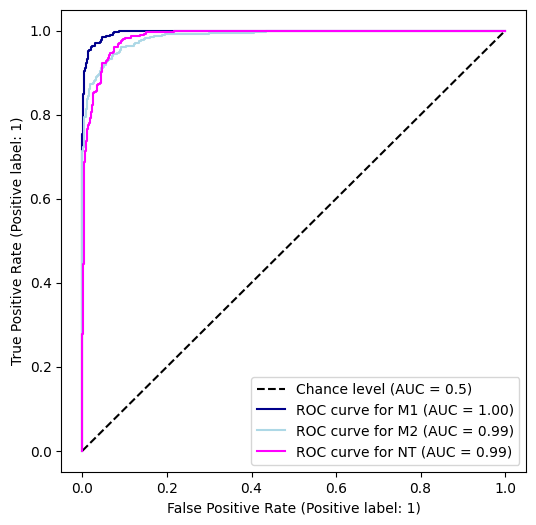

In [4]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

## Get the most important features

<AxesSubplot:ylabel='Feature'>

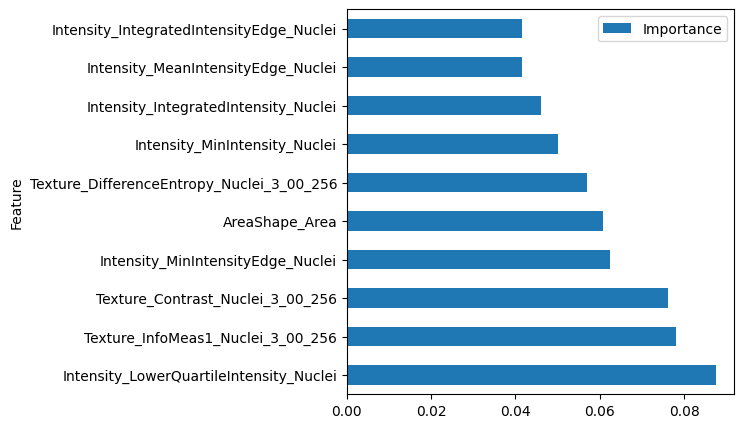

In [5]:
important_features_smooth = macrophages_analysis.get_best_features(pipe, all_surfaces.drop('CellType', axis=1), 10)
important_features_smooth.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))   

# 20x CD86+CD206 without intestity features

In [6]:
# make merged CD86+CD206 datasets
nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_p4g4_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_p4g4 = nucleus_dataset_p4g4_206.merge(nucleus_dataset_p4g4_86, how='outer')

nucleus_dataset_smooth_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_smooth_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_smooth = nucleus_dataset_smooth_206.merge(nucleus_dataset_smooth_86, how='outer')

nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_tcps_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_tcps = nucleus_dataset_tcps_206.merge(nucleus_dataset_tcps_86, how='outer')

all_surfaces_no_intensity = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.7326390438247012
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.7445736473915913


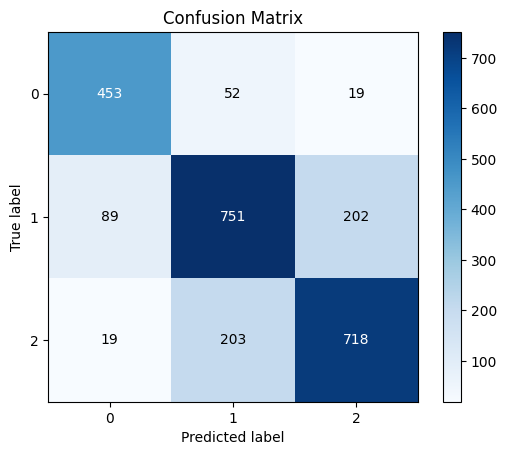

In [7]:
pipe_no_intensity, test_data_no_intensity = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_intensity, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9735809306660711
AUC score for M2 0.8684591422548062
AUC score for NT 0.9072681448873672
Average AUC 0.9164360726027482


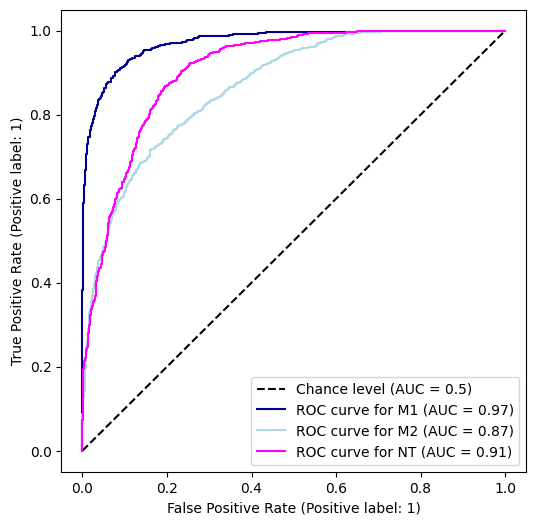

In [8]:
macrophages_analysis.make_multiclass_roc(pipe_no_intensity, test_data_no_intensity)

## Get the most important features

<AxesSubplot:ylabel='Feature'>

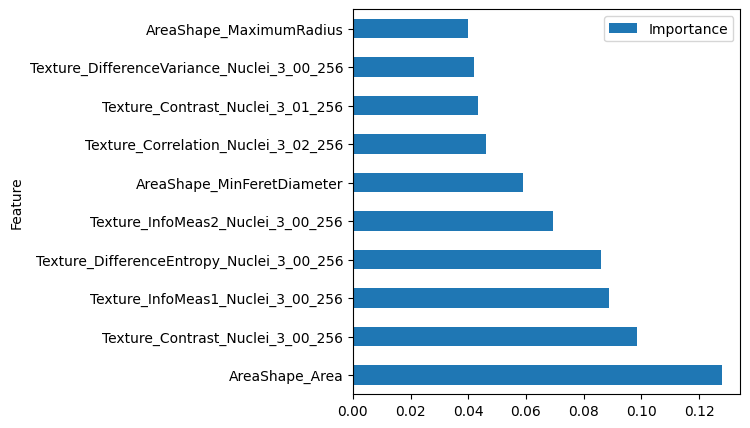

In [9]:
important_features_smooth = macrophages_analysis.get_best_features(pipe_no_intensity, all_surfaces_no_intensity.drop('CellType', axis=1), 10)
important_features_smooth.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))

# 20x CD86+CD206 without shape features

In [10]:
# make merged CD86+CD206 datasets
nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_p4g4_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_p4g4 = nucleus_dataset_p4g4_206.merge(nucleus_dataset_p4g4_86, how='outer')

nucleus_dataset_smooth_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_smooth_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_smooth = nucleus_dataset_smooth_206.merge(nucleus_dataset_smooth_86, how='outer')

nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_tcps_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_tcps = nucleus_dataset_tcps_206.merge(nucleus_dataset_tcps_86, how='outer')

all_surfaces_no_shape = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8523617529880477
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8579452894746232


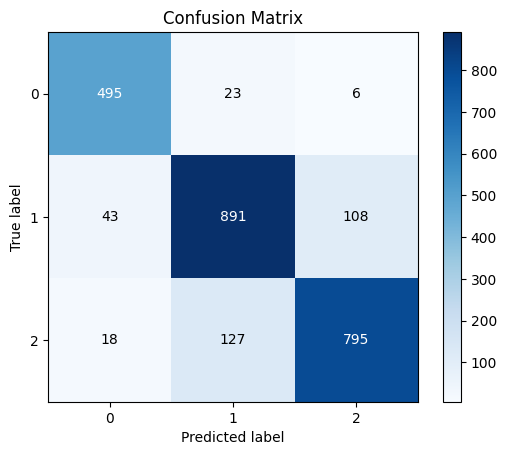

In [11]:
pipe_no_shape, test_data_no_shape = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_shape, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9931328521579714
AUC score for M2 0.9510491069087401
AUC score for NT 0.9629296758240266
Average AUC 0.969037211630246


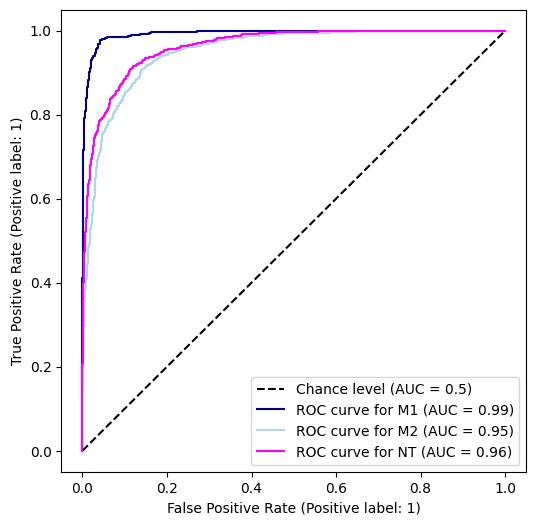

In [12]:
macrophages_analysis.make_multiclass_roc(pipe_no_shape, test_data_no_shape)

## Get the most important features

<AxesSubplot:ylabel='Feature'>

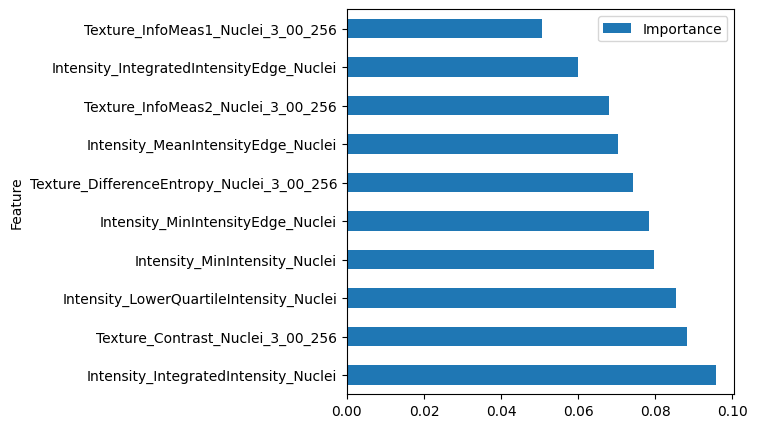

In [13]:
important_features_tcps = macrophages_analysis.get_best_features(pipe_no_shape, all_surfaces_no_shape.drop('CellType', axis=1), 10)
important_features_tcps.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))